<a href="https://colab.research.google.com/github/nguyen084/MATH5671/blob/master/group_005_assignment_003_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bankruptcy Prediction via Regression


In this assignment, you use the bankruptcy data set from a paper (see the reference in the bottom of the assignment). The data set can be downloaded from HuskyCT. The following is the information of the attributes/variables, from the income statements and balance sheets:

![image.png](attachment:image.png)


1)	Size
    
a.	Sales

2)	Profit

a.	ROCE: profit before tax=capital employed (%)

b.	FFTL: funds flow (earnings before interest, tax & depreciation)=total liabilities

3)	Gearing

a.	GEAR: (current liabilities + long-term debt)=total assets

b.	CLTA: current liabilities=total assets

4)	Liquidity

a.	CACL: current assets=current liabilities

b.	QACL: (current assets – stock)=current liabilities

c.	WCTA: (current assets – current liabilities)=total assets	

5)	LAG: number of days between account year end and the date the annual report and accounts were filed at company registry.

6)	AGE: number of years the company has been operating since incorporation date.

7)	CHAUD: coded 1 if changed auditor in previous three years, 0 otherwise

8)	BIG6: coded 1 if company auditor is a Big6 auditor, 0 otherwise

The target variable is FAIL, either = 1 or 0. You program and model using logistic regression.

#### Source:

Malcolm J. Beynon, Michael J. Peel, Variable precision rough set theory and data discretisation: an application to corporate failure prediction

## Modeling using scikit-learn

The fisrt part shows you how to use scikit-learn for this type of problems.

In [0]:
from google.colab import files
uploaded = files.upload()

Saving bankruptcytrainpost.csv to bankruptcytrainpost.csv


In [0]:
# Download the training data set and no-label test set from the practice project "Bankruptcy Prediction"
# bankruptcytrainpost.csv
# at https://www.scriptedin.com/contests/view/3

import pandas as pd
bankruptcy_df = pd.read_csv(r'bankruptcytrainpost.csv',header =0)
bankruptcy_df.head()

,SALES,ROCE,FFTL,GEAR,CLTA,CACL,QACL,WCTA,LAG,AGE,CHAUD,BIG6,FAIL
0,7646,31.2239,0.6312,0.5205,0.4829,1.6397,1.4935,0.3089,286,25,0,0,0
1,36067,10.9613,0.3540,0.3786,0.3786,1.5852,1.1626,0.2216,301,33,0,1,0
2,16737,17.9949,0.4388,0.5236,0.4347,1.1748,0.9795,0.0760,55,26,0,1,0
3,48162,6.1787,0.1181,0.9996,0.7437,1.3007,0.9070,0.2236,303,34,0,0,1
4,6953,0.0648,0.1447,0.9520,0.4976,1.0410,0.5355,0.0204,362,14,1,1,1


### Data Exploration

Exploring the dataset using plots, histograms, descriptive statistics, etc.

In [0]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
# target variable distribution
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
# replace yes by 1, no by 0
bankruptcy_df.groupby(['FAIL'])[['FAIL']].count()

,FAIL
FAIL,
0,22
1,22


In [0]:
bankruptcy_df.head()

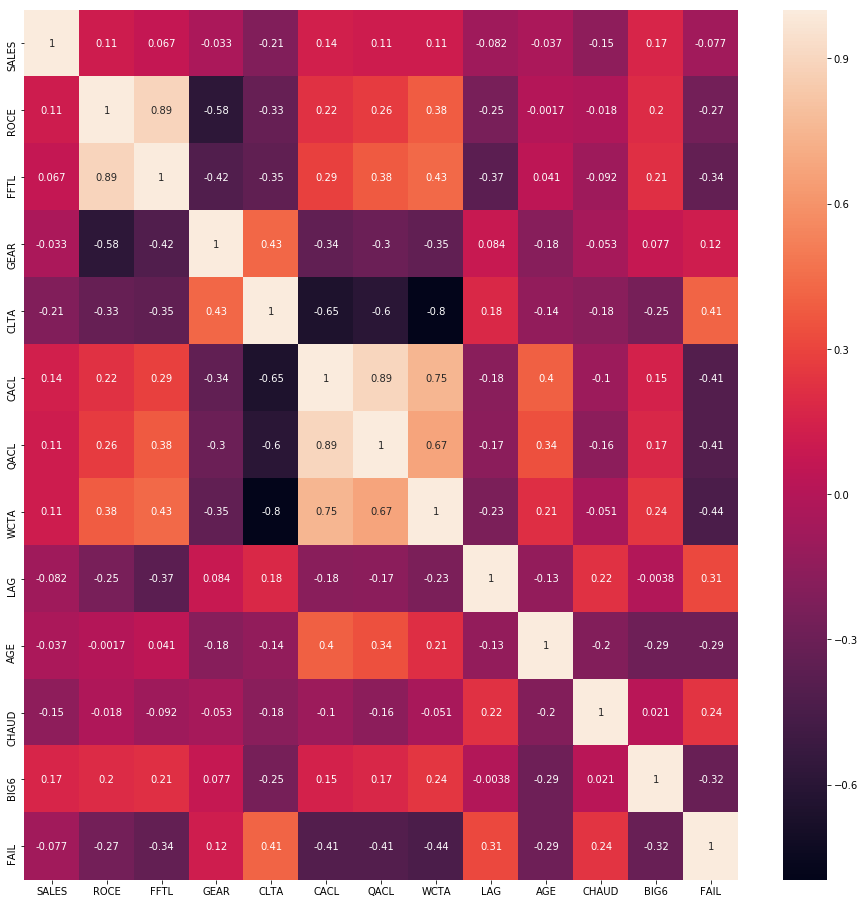

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = bankruptcy_df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr,annot = True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Preprocessing

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = bankruptcy_df[bankruptcy_df.columns.difference(['Firm', 'FAIL'])]
# min_max_scaler = preprocessing.MinMaxScaler()
# X = min_max_scaler.fit_transform(X)
y = bankruptcy_df[['FAIL']]
y = y.as_matrix()


# split the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [0]:
# This is to ignore some warnings
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [0]:
# RFE to select features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# Now select features
X_train = X_train.iloc[:,rfe.support_ == True]
X_test = X_test.iloc[:,rfe.support_ == True]


In [0]:
m , n = X_train.shape[0], X_train.shape[1]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train)
X_train = x_scaled
x_scaled_test = min_max_scaler.fit_transform(X_test)
X_test = x_scaled_test
initial_theta = np.zeros((n,1))

### Training, Testing and Validation

We train a model using the training data set, and test the model using the test data set we had from the splitting function above. The test data is unknown to the model.

In [0]:
# Usually the validation is done on several algorithms (like Logistic Regression, Random Forest, Gradient Boosting, etc.). 
# Best is to do cross validation, select a short list of promising models
# then fine-tune

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs')
logreg.fit(X_train, y_train)
y_train_pred = logreg.predict(X_test)
y_test_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on train set: 0.73
Accuracy of logistic regression classifier on test set: 0.71


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


How about precision and recall?

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)
print(classification_report(y_test, y_test_pred))

[[6 1]
 [3 4]]
              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.80      0.57      0.67         7

    accuracy                           0.71        14
   macro avg       0.73      0.71      0.71        14
weighted avg       0.73      0.71      0.71        14



Better is to do cross validation (such as K-folds: K-1 folds for training and 1 fold for validation, and repeat K times, then measure the mean performance). Scikit-learn has cross_val_score function for this purpose. Usually the validation is done on several algorithms (like Logistic Regression, Random Forest, Gradient Boosting, etc.). Select a short list of promising models, then fine-tune using GridSearchCV or RandomizedSearchCV. Alternatively using scikit-learn GridSearchCV with cross validation, we create a grid of hyper-parameters for training, and see which set of hyper-parameters would give the best performance. Then select the model with that set to predict unseen data in test set

This part of code is to validate the model, not required for this assignment

In [0]:
# this part of code is to validate the model, not required for this assignment
from sklearn.model_selection import GridSearchCV

# Create regularization hyperparameter space
C = np.logspace(0, 3, 10)

# Set the parameters by cross-validation, penalty is regularization
# As 'newton-cg','lbfgs','sag' only work with L2 regularization, we have 2 dictionaries: 
# hyper_parameters_l1, and hyper_parameters_l2 in hyper_parameters dict
hyper_parameters_l1 = dict(C=C, penalty=['l2'], solver=['newton-cg','lbfgs','sag'])
hyper_parameters_l2 = dict(C=C, penalty=['l1', 'l2'], solver=['liblinear', 'saga'])
hyper_parameters = [hyper_parameters_l1, hyper_parameters_l2]
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    clf = GridSearchCV(logreg, hyper_parameters, cv=5, scoring='%s_macro' % score)

    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

## Your work

Starting here write your own logistic regression code to classify companies using test data, compute the accuracy, confusion matrix, precision, recall. Start with writing individual functions, then the main code that calls the functions above to train a model using the training data and return theta, then test the model using the test data, compute accuracy, confusion matrix, precision, recall.

Your code uses the same training dataset above bankruptcytrainpost.csv. Think Data Exploration & Preprocessing were already done above.

### Data Exploration

Done above

### Preprocessing

Done above

### Training, Testing and Validation

In [0]:
# Q1
from sklearn import preprocessing #Use this library to normalize the dataset
def computeCost(X, y, theta = None, Lambda = 0):
    # write your code here
    m=len(y) #m is the length of y
    h = sigmoid(np.dot(X,theta)) #hypothesis is calculated using sigmoid function
    error = (-y * np.log(h)) - ((1-y)*np.log(1-h)) #error of each value
    cost = 1/m * sum(error)+ Lambda/(2*m) * sum(theta**2) #sum of error with regulator
    return cost[0]

In [0]:
# Q2
# Set regularization parameter lambda to 1
def optimizeCost(X, y, theta, alpha, lambdad, maxrun):
    # write your code here
    m = len(y)
    costs = [] #create a vector to plot the costs after
    for i in range(maxrun):
      h = sigmoid(np.dot(X,theta))
      grad = (1/m) * np.dot(X.T,(h-y)) 
      grad[1:]=grad[1:]+(lambdad/m)* theta[1:] #grad value after initial is included with a regulator.
      theta = theta - alpha*grad
      cost = computeCost(X,y,theta,Lambda) #update the cost
      costs.append(cost)
    return theta, costs

In [0]:
# Q3
def sigmoid(z):
    # write your code here
    d = (1. + np.exp(-z))
    return 1. / d

0.27248678826692035


Text(0.5, 1.0, 'Cost function using Gradient Descent')

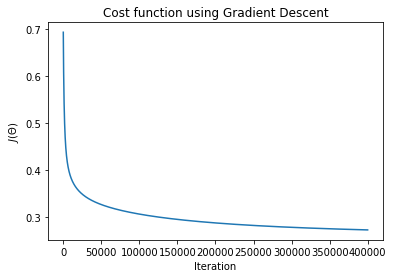

In [0]:
# Q4
# Your main code for Training, Testing starts here. 
Lambda = 0.001
theta , costs = optimizeCost(X_train,y_train,initial_theta,0.01,Lambda,400000)
print(costs[-1])
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
#Plot show the convergence of of the model



In [0]:
#Using the training weight obtained above, use to predict
def predict(features, weights):
  '''
  Returns 1D array of probabilities
  that the class label == 1
  '''
  z = np.dot(features, weights)
  return sigmoid(z)
def decision_boundary(prob):
  return [1 if i >= .5 else 0 for i in prob]
y_pred = decision_boundary(predict(X_train,theta))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#These are the accuracy and confusion matrix for training set
confusion_matrix_train = confusion_matrix(y_train.ravel(), y_pred)
print(confusion_matrix_train)
print(classification_report(y_train.ravel(), y_pred))

[[13  2]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.87      0.87      0.87        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



In [0]:
#Below is the accuracy and confusion matrix for testing set.
#We can observe that the model is overerfitting. Perhaps addin
#g a regulator does not improve the model, or we need to choose a better paratemer
y_test_pred = decision_boundary(predict(X_test,theta))
confusion_matrix_test = confusion_matrix(y_test.ravel(), y_test_pred)
print(confusion_matrix_test)
print(classification_report(y_test.ravel(), y_test_pred))

[[5 2]
 [2 5]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.71      0.71      0.71         7

    accuracy                           0.71        14
   macro avg       0.71      0.71      0.71        14
weighted avg       0.71      0.71      0.71        14



In [0]:
from google.colab import files
uploaded = files.upload()

Saving bankruptcytestpostnolabel.csv to bankruptcytestpostnolabel.csv


In [0]:
# Q5
# Now with a no-label test set
# Using the trained model, what are the labels of these records?
# Should select only features that were used previously in the model
bankruptcy_test_df = pd.read_csv(r'bankruptcytestpostnolabel.csv',header =0)
bankruptcy_test_df.head()

My_X_test = bankruptcy_test_df.iloc[:,rfe.support_ == True]
x_scaled_testt = min_max_scaler.fit_transform(My_X_test)
My_X_test = x_scaled_testt
# Write code from here. The data frame after feature selection is My_X_test. Use it to predict
y_testt_pred = decision_boundary(predict(My_X_test,theta))


In [0]:
y_testt_pred

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0]

Now have some fun. Assuming My_y_pred is the predicted result as a list. Export the result to a csv file as follows. The first column is numbered starting from 1; The second is the label of the prediction. Submit the csv to the contest at https://www.scriptedin.com/contests/view/3 via Add Submission to see where you are on the leaderboard.

In [0]:
pd.DataFrame(list(zip(list(range(1, len(y_testt_pred) + 1)),y_testt_pred)), columns=['num','label']).to_csv(r'submission.csv', index=None, header=True)

In [0]:
files.download('submission.csv')
#Got 75% accuracy.